In [1]:
import pandas as pd
import numpy as np
import socket
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from datetime import datetime
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from graphviz import Source
from IPython.display import SVG
from sklearn.svm import SVC
from sklearn import svm
import networkx as nx
import colorsys
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('Best_Features_Final_Fraud_Data.csv')
df.head()

,purchase_value,age,time_diff,total_purchase,purchase_week,class,source_0,source_1,source_2,browser_0,...,country_178,country_179,country_180,country_181,device_id_unique_0,device_id_unique_1,ip_address_unique_0,ip_address_unique_1,time_diff_unique_0,time_diff_unique_1
0,-0.160204,0.679914,-1.038811,-0.249985,16,0,0,0,1,1,...,0,0,0,0,1,0,1,0,1,0
1,-1.142592,2.304476,-0.882878,-0.408448,24,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
2,-1.197169,2.304476,-1.571680,1.035319,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,0.385567,0.911994,0.734846,-0.161951,19,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,0.112681,1.376155,0.019901,-0.205968,37,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0


### Models

In [3]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

oversample = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

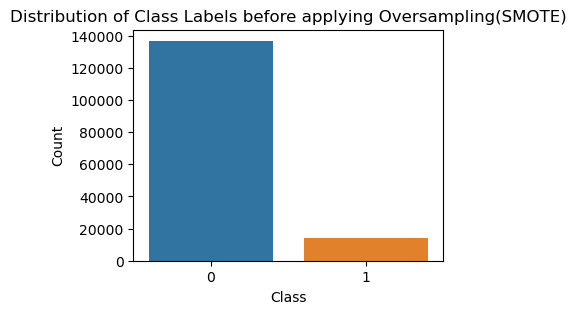

In [4]:
plt.figure(figsize=(4, 3))
sns.countplot(x=y)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Class Labels before applying Oversampling(SMOTE)")
plt.show()

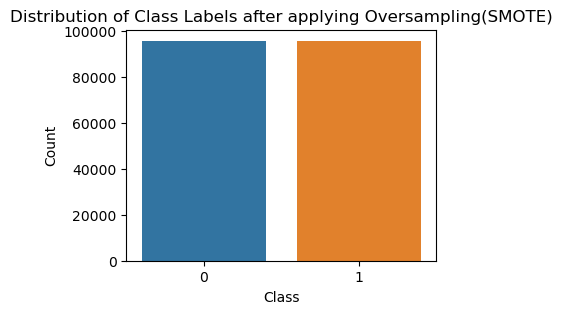

In [5]:
plt.figure(figsize=(4, 3))
sns.countplot(x=y_train)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Class Labels after applying Oversampling(SMOTE)")
plt.show()

# Decision Tree Classifier

Confusion Matrix:
[[38584  2454]
 [ 1706  2590]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     41038
           1       0.51      0.60      0.55      4296

    accuracy                           0.91     45334
   macro avg       0.74      0.77      0.75     45334
weighted avg       0.92      0.91      0.91     45334



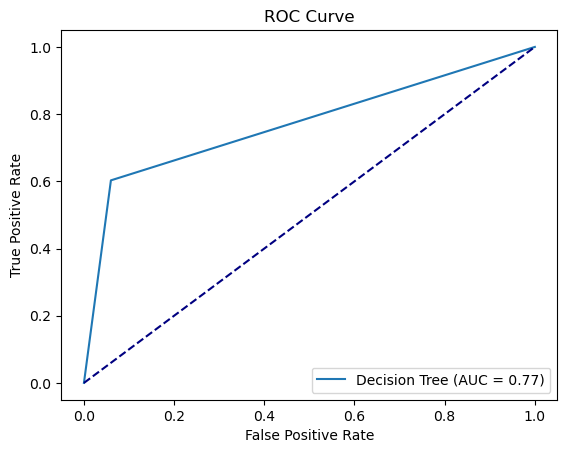

In [6]:
# Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# graph = Source(tree.export_graphviz(clf, out_file=None,feature_names=feature_cols,class_names=['0', '1'], filled = True))
# display(SVG(graph.pipe(format='svg')))
# pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_})

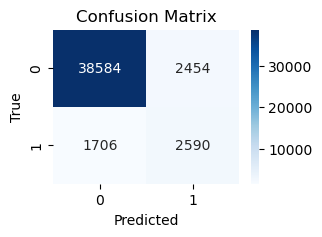

In [7]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

Best max_depth: 100
Confusion Matrix:
[[38588  2450]
 [ 1706  2590]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     41038
           1       0.51      0.60      0.55      4296

    accuracy                           0.91     45334
   macro avg       0.74      0.77      0.75     45334
weighted avg       0.92      0.91      0.91     45334



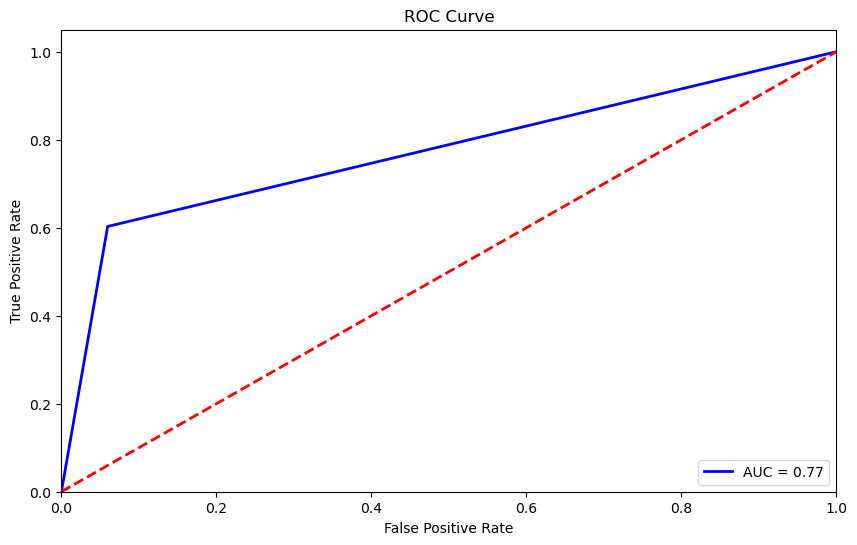

In [8]:
# Decision Tree with hyperparameters
param_grid = {'max_depth': [2, 4, 6, 8, 10, 20, 30, 50, 100]}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
print("Best max_depth:", grid_search.best_params_['max_depth'])
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = best_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

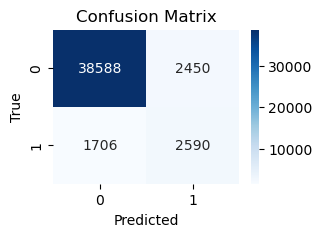

In [9]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# MLP Classifier

In [10]:
def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])
    G = nx.DiGraph()
    pos = {}
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)
    for j in range(hidden_layers_n):
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)
    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]
    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)

Confusion Matrix:
[[41015    23]
 [ 1970  2326]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41038
           1       0.99      0.54      0.70      4296

    accuracy                           0.96     45334
   macro avg       0.97      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



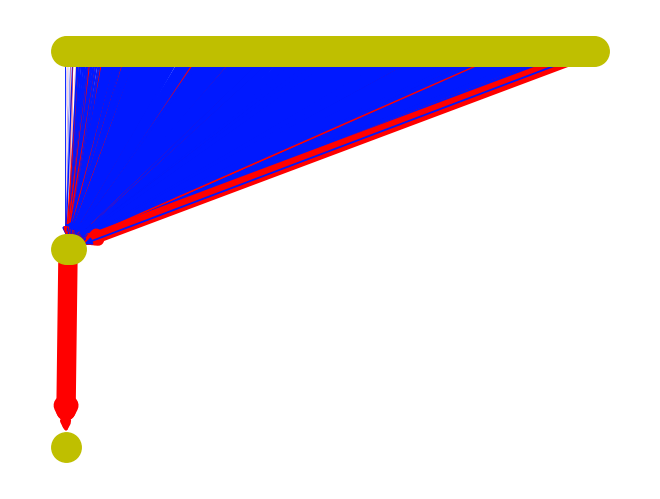

In [11]:
# Default MLP Classifier
clf = MLPClassifier(hidden_layer_sizes=(3),max_iter=5000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
show_ann(clf)

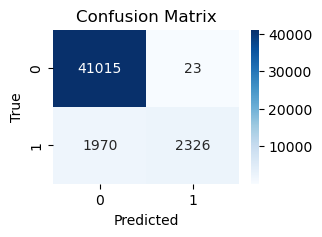

In [12]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[40985    53]
 [ 1954  2342]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41038
           1       0.98      0.55      0.70      4296

    accuracy                           0.96     45334
   macro avg       0.97      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



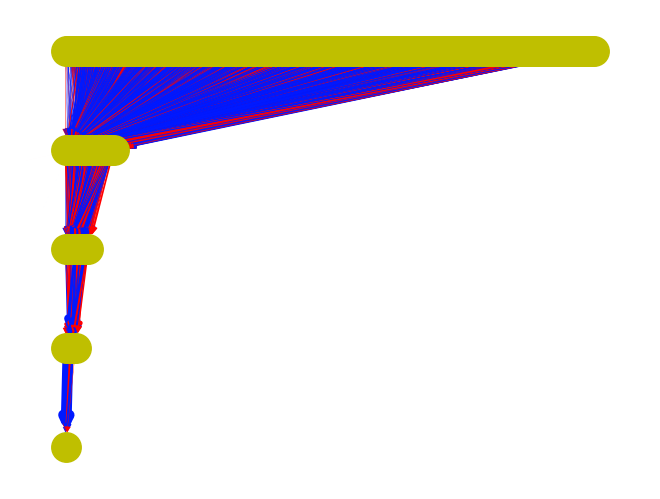

In [13]:
# Default MLP Classifier with more layers
clf = MLPClassifier(hidden_layer_sizes=(20, 10, 5),max_iter=5000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
show_ann(clf)

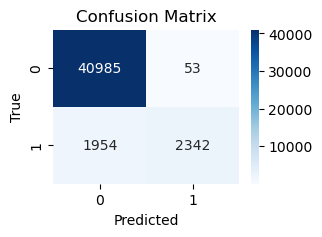

In [14]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# K Neighbors Classifier

Confusion Matrix:
[[32867  8171]
 [ 1294  3002]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     41038
           1       0.27      0.70      0.39      4296

    accuracy                           0.79     45334
   macro avg       0.62      0.75      0.63     45334
weighted avg       0.90      0.79      0.83     45334

AUC-ROC score: 0.8055


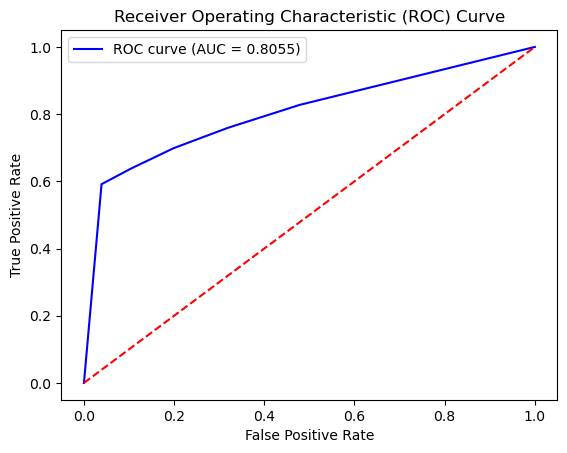

In [15]:
# K Neighbors Classifier with default classifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC score: {auc_score:.4f}')
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

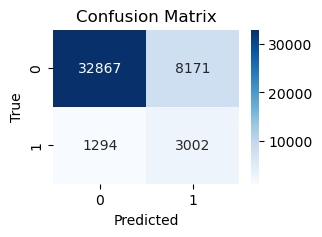

In [16]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

Best n_neighbors: 3
Confusion Matrix:
[[33877  7161]
 [ 1356  2940]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     41038
           1       0.29      0.68      0.41      4296

    accuracy                           0.81     45334
   macro avg       0.63      0.75      0.65     45334
weighted avg       0.90      0.81      0.84     45334



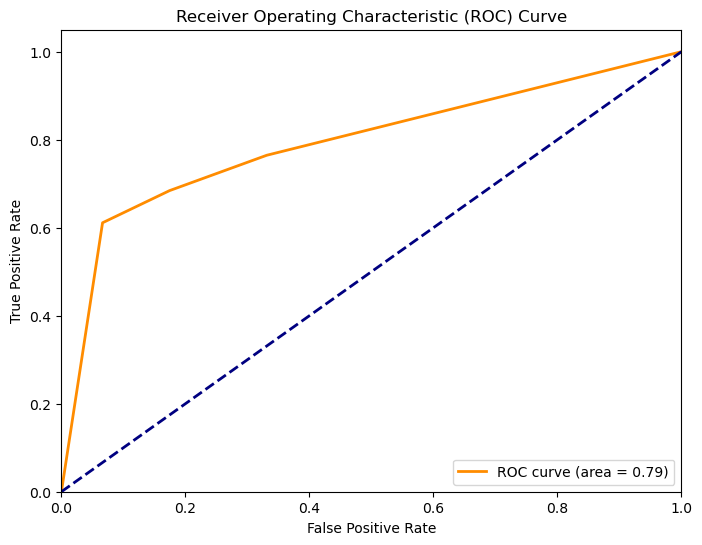

In [17]:
# K Neighbors Classifier with hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9]}
clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = best_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

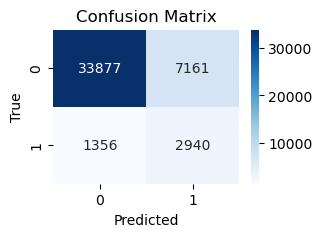

In [18]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# Random Forest 

Confusion Matrix:
[[40593   445]
 [ 1824  2472]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41038
           1       0.85      0.58      0.69      4296

    accuracy                           0.95     45334
   macro avg       0.90      0.78      0.83     45334
weighted avg       0.95      0.95      0.95     45334



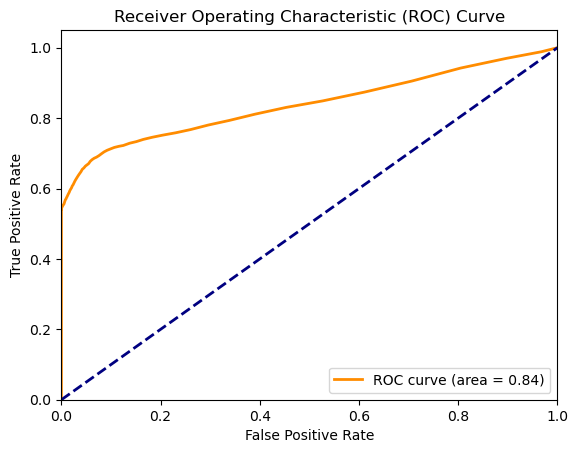

In [19]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

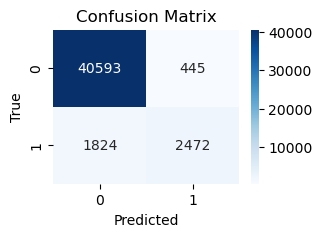

In [20]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

Best parameters: {'max_depth': 8, 'n_estimators': 200}
Confusion Matrix:
[[38498  2540]
 [ 1247  3049]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     41038
           1       0.55      0.71      0.62      4296

    accuracy                           0.92     45334
   macro avg       0.76      0.82      0.79     45334
weighted avg       0.93      0.92      0.92     45334

AUC-ROC score: 0.8414


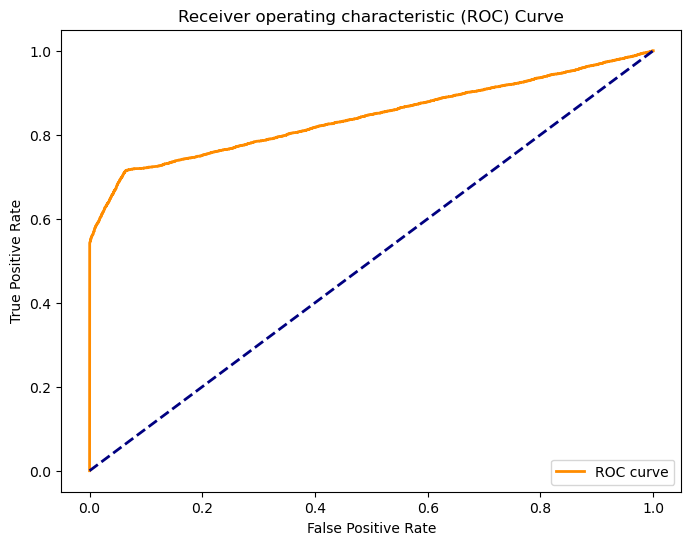

In [21]:
# Random Forest with hyperparameters
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [4, 8]}
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
print("Best parameters:", grid_search.best_params_)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = best_rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC score: {auc_score:.4f}')
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

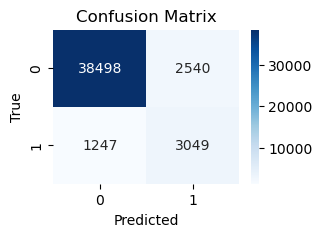

In [22]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# Light Gradient Boosting

Confusion Matrix:
[[40983    55]
 [ 1949  2347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41038
           1       0.98      0.55      0.70      4296

    accuracy                           0.96     45334
   macro avg       0.97      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334

AUC-ROC score: 0.8430


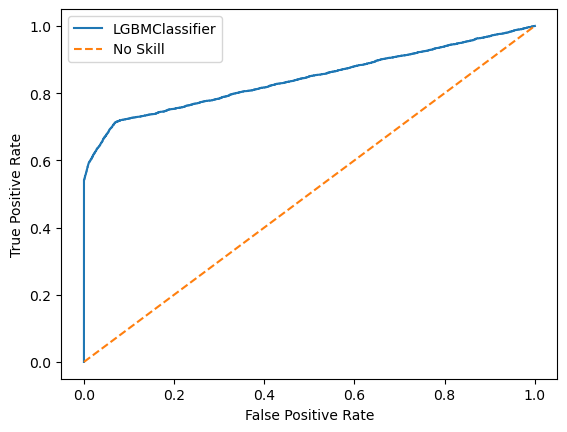

In [23]:
# Light Gradient Boosting Machine Classifier
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC score: {auc_score:.4f}')
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='LGBMClassifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

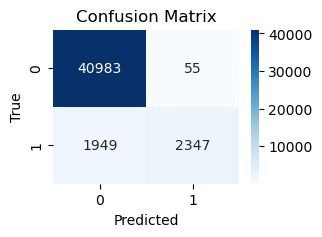

In [24]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

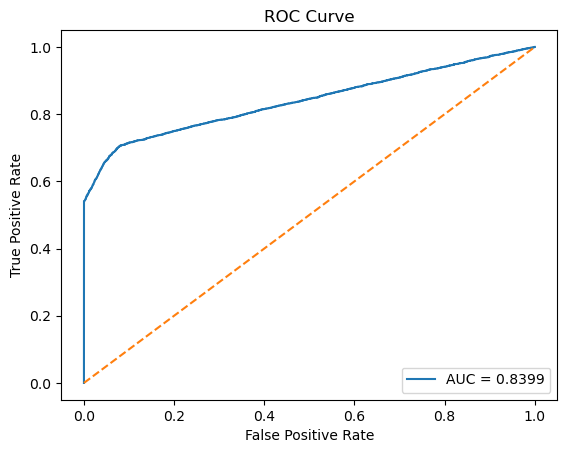

Best hyperparameters: {'learning_rate': 1, 'max_depth': 5, 'num_leaves': 10}
Confusion Matrix:
[[40834   204]
 [ 1924  2372]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.97     41038
           1       0.92      0.55      0.69      4296

    accuracy                           0.95     45334
   macro avg       0.94      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334



In [25]:
# Light Gradient Boosting Machine Classifier with hyperperameters
param_grid = {'max_depth': [3, 5, 10], 'num_leaves': [5, 10], 'learning_rate': [0.01, 0.1, 1]}
clf = lgb.LGBMClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_prob = best_clf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
y_pred = best_clf.predict(X_test)
print("Best hyperparameters:", grid_search.best_params_)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

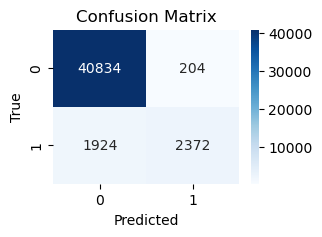

In [26]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# AdaBoost Classifier

Confusion Matrix:
[[39556  1482]
 [ 1558  2738]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     41038
           1       0.65      0.64      0.64      4296

    accuracy                           0.93     45334
   macro avg       0.81      0.80      0.80     45334
weighted avg       0.93      0.93      0.93     45334

AUC-ROC score: 0.8430


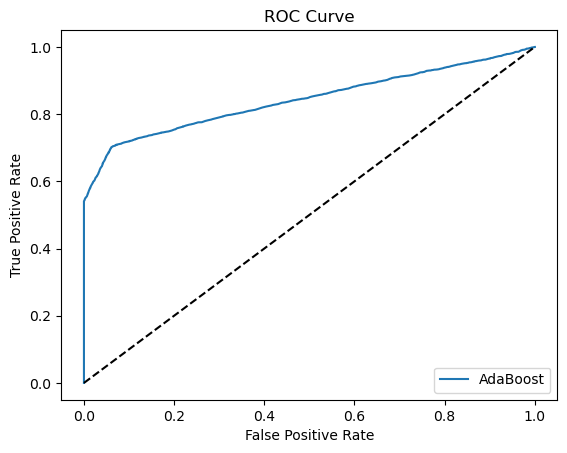

In [27]:
# AdaBoost Classifier with default classifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC score: {auc_score:.4f}')
plt.plot(fpr, tpr, label='AdaBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

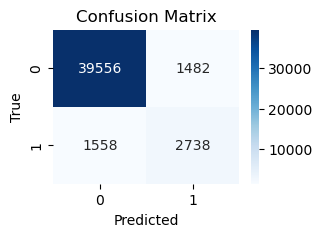

In [28]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

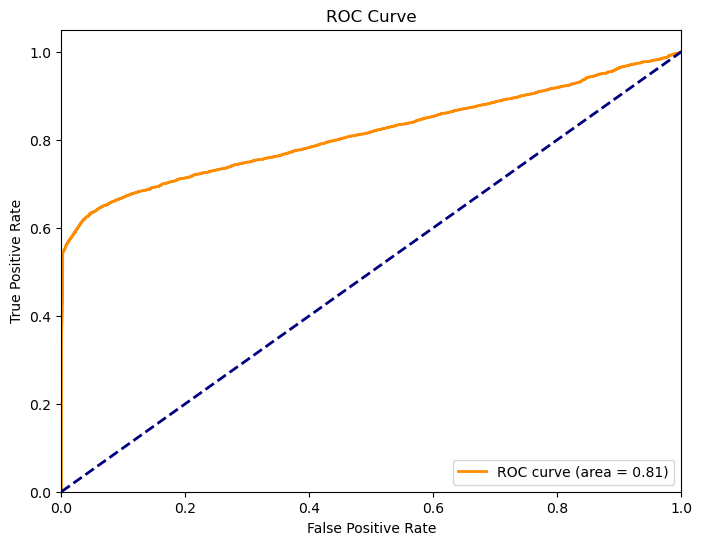

Best parameters: {'learning_rate': 1, 'n_estimators': 100}
Confusion Matrix:
[[40431   607]
 [ 1823  2473]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41038
           1       0.80      0.58      0.67      4296

    accuracy                           0.95     45334
   macro avg       0.88      0.78      0.82     45334
weighted avg       0.94      0.95      0.94     45334



In [29]:
# AdaBoost Classifier with hyperparameters
param_grid = {'n_estimators': [50, 100],'learning_rate': [0.01, 0.1, 1]}
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5))
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_prob = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
y_pred = best_clf.predict(X_test)
print("Best parameters:", grid_search.best_params_)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

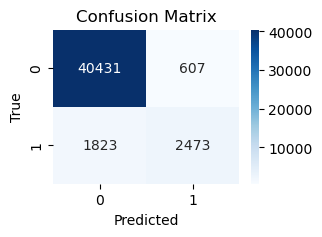

In [30]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# Gradient Boosting Classifier

AUC-ROC score: 0.8423


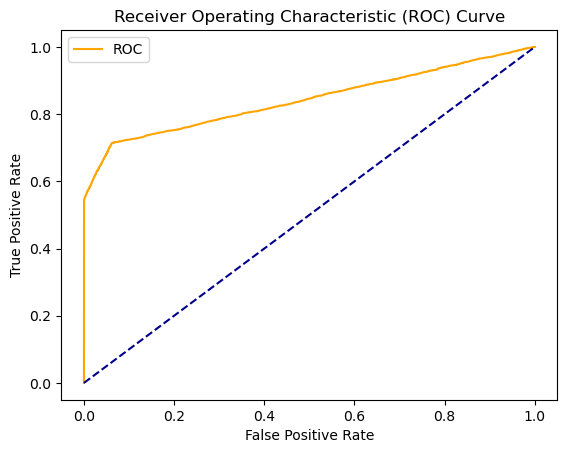

Confusion Matrix:
[[38715  2323]
 [ 1286  3010]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     41038
           1       0.56      0.70      0.63      4296

    accuracy                           0.92     45334
   macro avg       0.77      0.82      0.79     45334
weighted avg       0.93      0.92      0.92     45334



In [31]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC score: {auc_score:.4f}')
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

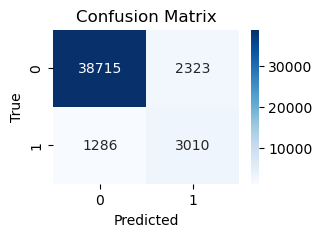

In [32]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

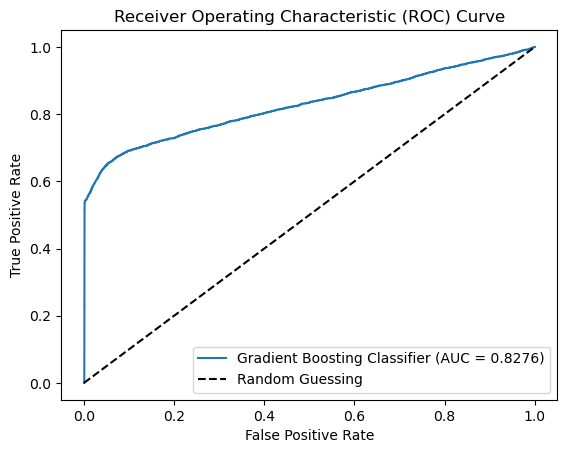

Best hyperparameters: {'learning_rate': 1.0, 'max_depth': 6, 'n_estimators': 100}
Confusion Matrix:
[[40515   523]
 [ 1869  2427]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41038
           1       0.82      0.56      0.67      4296

    accuracy                           0.95     45334
   macro avg       0.89      0.78      0.82     45334
weighted avg       0.94      0.95      0.94     45334



In [33]:
# Gradient Boosting Classifier with hyperparameters
param_grid = {'max_depth': [2, 4, 6],'n_estimators': [50, 100],'learning_rate': [0.01, 0.1, 1.0]}
clf = GradientBoostingClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
y_prob = best_clf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Gradient Boosting Classifier (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print("Best hyperparameters:", grid_search.best_params_)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

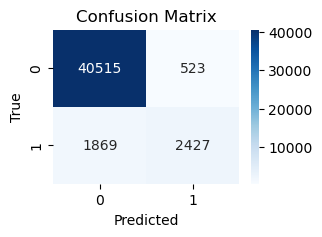

In [34]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# Logistic Regression Classifier

Confusion Matrix:
[[40809   229]
 [ 1912  2384]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41038
           1       0.91      0.55      0.69      4296

    accuracy                           0.95     45334
   macro avg       0.93      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334



/Users/svinayachanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


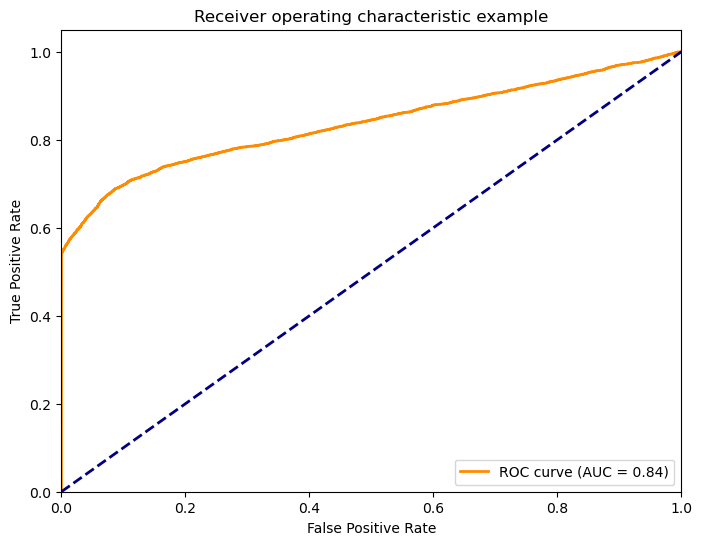

In [35]:
# Logistic Regression Classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

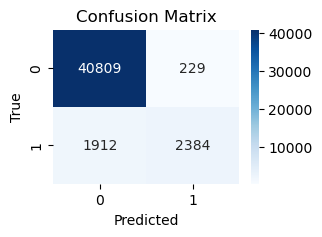

In [36]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

Best hyperparameters: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
Confusion Matrix:
[[41022    16]
 [ 1971  2325]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41038
           1       0.99      0.54      0.70      4296

    accuracy                           0.96     45334
   macro avg       0.97      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



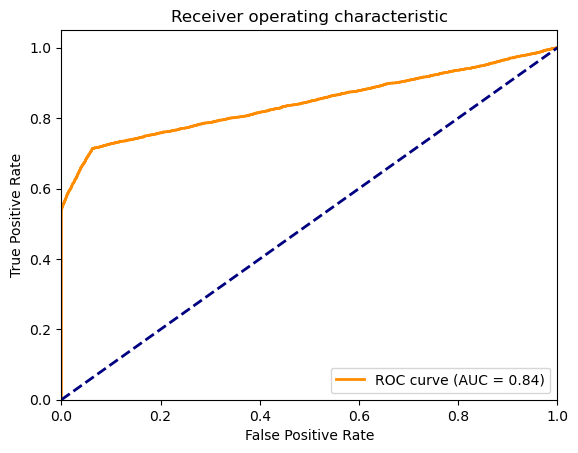

In [37]:
# Logistic Regression with hyperparameters
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
              'class_weight': [{0:1, 1:1}, {0:2, 1:1}, {0:1, 1:2}, {0:3, 1:1}, {0:1, 1:3}, 'balanced', None]}
clf = LogisticRegression(solver='liblinear', max_iter=1000)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
print("Best hyperparameters:", grid_search.best_params_)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = best_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

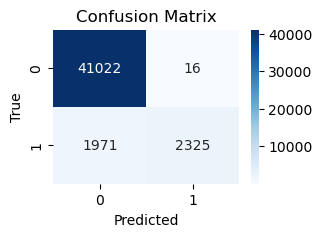

In [38]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# XGBoost Classifier

AUC-ROC score: 0.8404


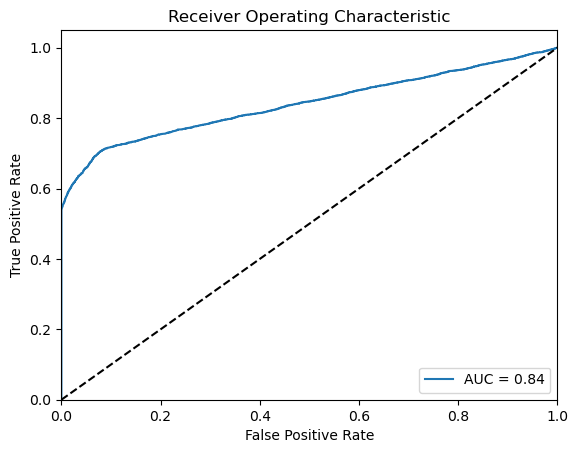

Confusion Matrix:
[[40820   218]
 [ 1891  2405]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41038
           1       0.92      0.56      0.70      4296

    accuracy                           0.95     45334
   macro avg       0.94      0.78      0.84     45334
weighted avg       0.95      0.95      0.95     45334



In [39]:
# XGBoost Classifier with default hyperparameters
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC score: {auc_score:.4f}')
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

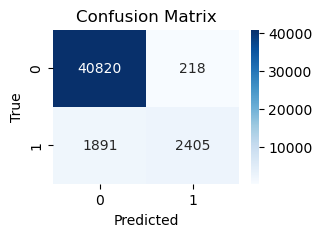

In [40]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.6}
Confusion Matrix:
[[40637   401]
 [ 1825  2471]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41038
           1       0.86      0.58      0.69      4296

    accuracy                           0.95     45334
   macro avg       0.91      0.78      0.83     45334
weighted avg       0.95      0.95      0.95     45334



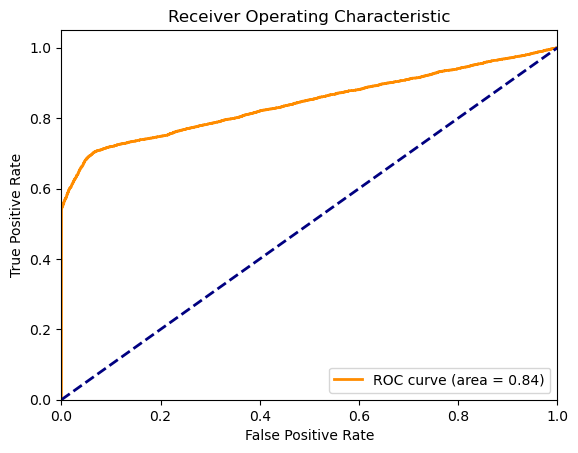

In [41]:
# XGBoost Classifier with hyperparameters
param_grid = {'learning_rate': [0.01, 0.1],'max_depth': [3, 5, 7],'subsample': [0.6, 0.8],'colsample_bytree': [0.6, 0.8]}
clf = XGBClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
y_prob = best_clf.predict_proba(X_test)[:, 1]
print("Best hyperparameters:", grid_search.best_params_)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

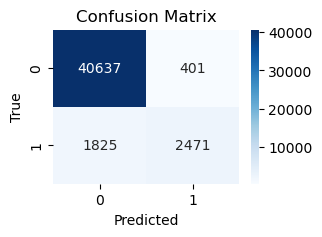

In [42]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# Extra Trees Classifier 

Confusion Matrix:
[[40538   500]
 [ 1838  2458]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41038
           1       0.83      0.57      0.68      4296

    accuracy                           0.95     45334
   macro avg       0.89      0.78      0.82     45334
weighted avg       0.94      0.95      0.94     45334



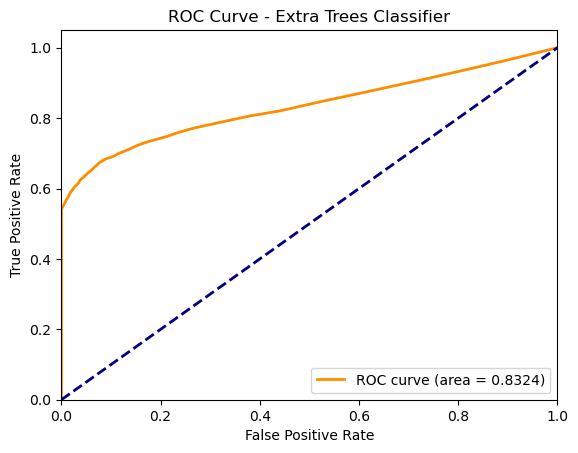

In [43]:
# Extra Trees Classifier 
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_prob = etc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extra Trees Classifier')
plt.legend(loc="lower right")
plt.show()

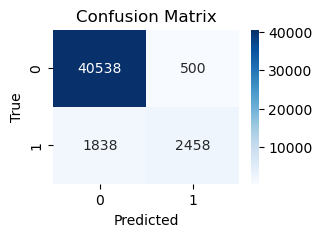

In [44]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

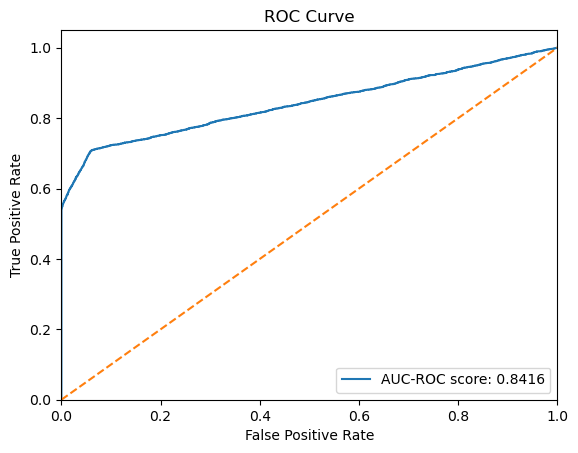

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Confusion Matrix:
[[39805  1233]
 [ 1577  2719]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     41038
           1       0.69      0.63      0.66      4296

    accuracy                           0.94     45334
   macro avg       0.82      0.80      0.81     45334
weighted avg       0.94      0.94      0.94     45334



In [45]:
# Extra Trees Classifier with hyperperameters
param_grid = {'n_estimators': [50, 100],'max_depth': [10, 20],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}
etc = ExtraTreesClassifier()
grid_search = GridSearchCV(etc, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_etc = grid_search.best_estimator_
y_pred = best_etc.predict(X_test)
y_prob = best_etc.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC-ROC score: {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
print("Best hyperparameters:", grid_search.best_params_)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

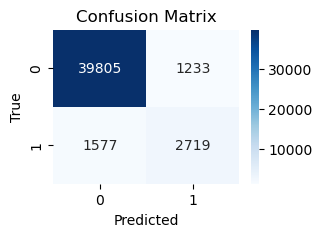

In [46]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()